# Non traditional use of coordinates

In [1]:
push!(LOAD_PATH,"C:/JMB/DIVAnd.jl/src","."); using DIVAnd;cd("C:/JMB/DIVAnd.jl");cd("examples");using PyPlot


Imagine a signal as the following

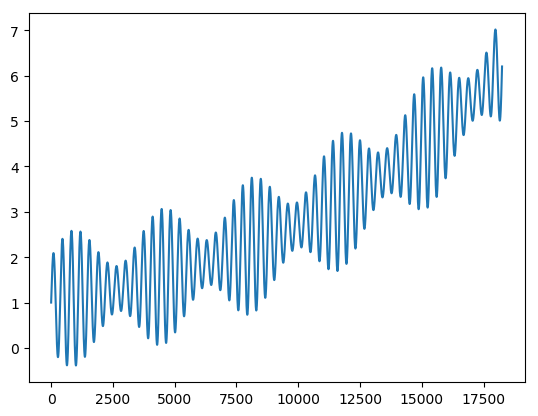

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003ADB4E10>

In [13]:
years=50
samplingdistance=1
t=collect(0:samplingdistance:365*years);

f=(1+0.5*sin.(2*pi*t/3600.)).*sin.(2*pi*t/365)+ exp.(t/10000.)

ff=f
tf=t
plot(t,f)

But which you sample only marginally

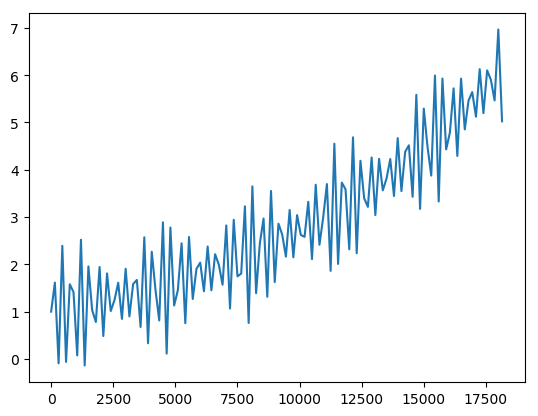

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026C9FBE0>

In [3]:
samplingdistance=150
t=collect(0:samplingdistance:365*years);

f=(1+0.5*sin.(2*pi*t/3600.)).*sin.(2*pi*t/365)+ exp.(t/10000.)
plot(t,f)

To which you add some noise

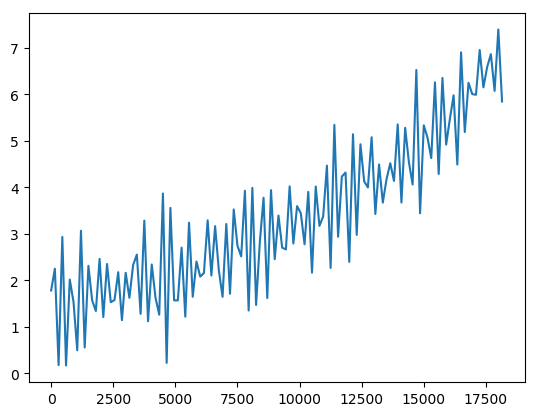

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000270FC7B8>

In [4]:
f=f+rand(size(f));
plot(t,f)

If you KNOW there is a periodic signal with KNOWN period use a new coordinate

In [5]:
t1=mod.(t,365);

Now analyse in the (t,t1) space ! Length scale for t: 1000 and for t1: 100. And force periodicity in t1.

In [6]:

xi,yi = ndgrid(linspace(0,years*365,years),linspace(0,365.,365));
mask = trues(xi);

# this problem has a simple cartesian metric
# pm is the inverse of the resolution along the 1st dimension
# pn is the inverse of the resolution along the 2nd dimension

pm = ones(xi) / (xi[2,1]-xi[1,1]);
pn = ones(xi) / (yi[1,2]-yi[1,1]);

fi,s=DIVAndrun(mask,(pm,pn),(xi,yi),(t,t1),f-mean(f),(1000.,100.),0.5;moddim=[0,365]) ;

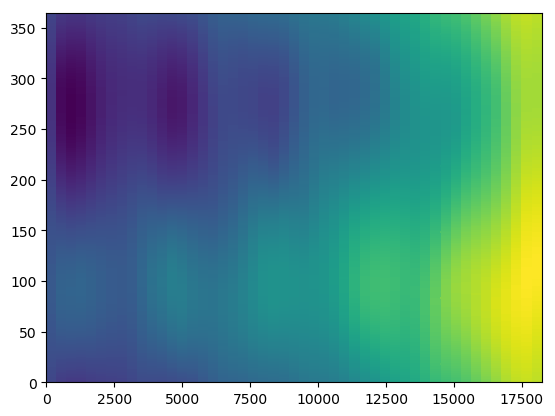

PyObject <matplotlib.collections.PolyCollection object at 0x00000000273C9DA0>

In [7]:
pcolor(xi,yi,fi)

In [8]:
plot(yi[1,:],fi[70,:])
title("in new t1 space")

LoadError: [91mBoundsError: attempt to access 50×365 Array{Float64,2} at index [70, Base.Slice(Base.OneTo(365))][39m

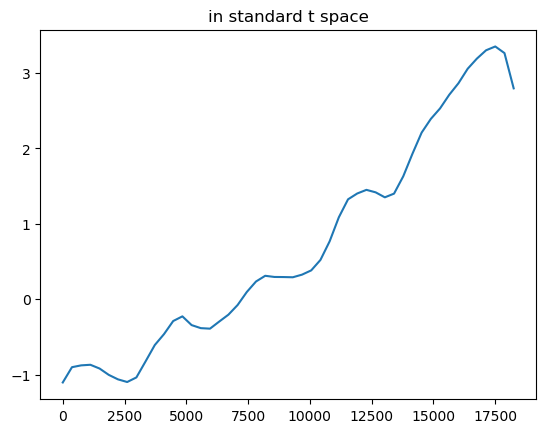

PyObject Text(0.5,1,u'in standard t space')

In [9]:
plot(xi[:,70],fi[:,70])
title("in standard t space")

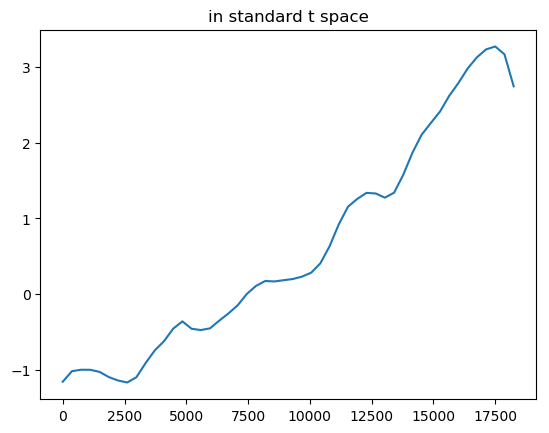

PyObject Text(0.5,1,u'in standard t space')

In [10]:
plot(xi[:,55],fi[:,55])
title("in standard t space")

# Can be used for daily cycles, annual cycles, but also tidal cycles

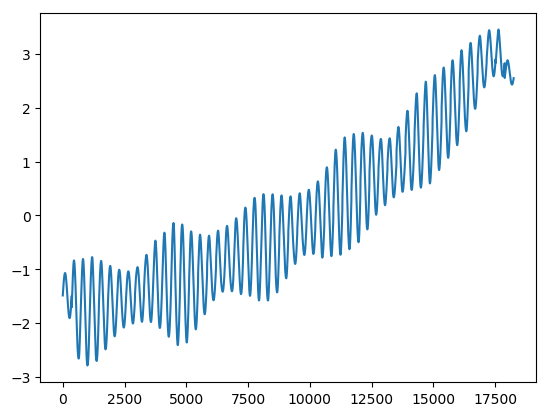

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003940D160>

In [11]:
plot(reshape(fi',50*365))

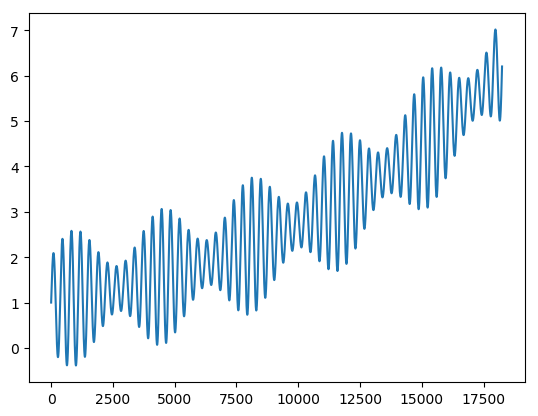

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003B2F0BA8>

In [14]:
plot(tf,ff)